Home Assignment 2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets.olivetti_faces import fetch_olivetti_faces
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from keras.models import Sequential, Model
from keras.layers import Input, Flatten, Dense, Activation, Dropout
from tensorflow.keras.utils import plot_model
from keras import regularizers
from keras.losses import mse, binary_crossentropy

from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, precision_score, recall_score

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.olivetti_faces module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [ ]:
#Fetching data
faces = fetch_olivetti_faces()
x, y = faces['data'], faces['target']

#Prints info about data.
#print(f'Data shape: {x.shape}')
#print(f'Label shape: {y.shape}')

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /root/scikit_learn_data
Data shape: (400, 4096)
Label shape: (400,)


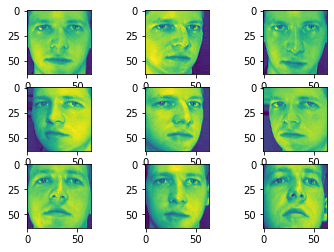

In [ ]:
#Peak into the grid:
for i in range(0, 9):
  plt.subplot(330 + 1 + i)
  plt.imshow(x[i].reshape(64, 64))

In [ ]:
##Point from assignment: 
#Divide data into training, validation and testing (shuffle)

#Separate dataset into ones for training and testing etc.
#And set the test size and random state values

x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.2, random_state=42)

In [ ]:
##Point from assignemnt:
#use PCA for diensionality reduction - reconstruct images using subset of features.
pca = PCA(n_components=8*8)
pca.fit(x)
cumsum = np.cumsum(pca.explained_variance_ratio_)

x_reduced = pca.fit_transform(x_test)
x_recovered = pca.inverse_transform(x_reduced)

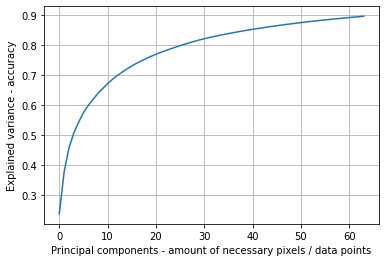

At 64x64 pixels (64 pca) we will get a 90% accuracy


In [ ]:
#To look at the data we just retrieved
#We create a grid and plot the data.

#plt.figure()
#plt.plot(range(len(cumsum)), cumsum)
#plt.grid()
#plt.xlabel('Principal components - amount of necessary pixels / data points')
#plt.ylabel('Explained variance - accuracy')
#plt.show()
#print('At 64x64 pixels (64 pca) we will get a 90% accuracy')

In [ ]:
##Point from assignemnt:
#use autoencoder - reconstruct using a compressed representation (code)

autoencoder = Sequential()

#Encoder
autoencoder.add(Dense(units=1024, activation='relu', input_dim=64*64, name='encoder_layer1'))
autoencoder.add(Dense(units=512, activation='relu', input_dim=1024, name='encoder_layer2'))
autoencoder.add(Dense(units=64, activation='relu', input_dim=512, name='encoder_layer3'))

#Decoder
autoencoder.add(Dense(units=512, activation='relu', name='decoder_layer1'))
autoencoder.add(Dense(units=1024, activation='relu', name='decoder_layer2'))
autoencoder.add(Dense(units=64*64, activation='sigmoid', name='decoder_layer3'))


autoencoder.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

autoencoder.summary()

history = autoencoder.fit(x = xtrain, y= xtrain, epochs=1000, batch_size=32, shuffle=True, validation_data=(xtrain, xtrain), verbose=1)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
encoder_layer1 (Dense)       (None, 1024)              4195328   
_________________________________________________________________
encoder_layer2 (Dense)       (None, 512)               524800    
_________________________________________________________________
encoder_layer3 (Dense)       (None, 64)                32832     
_________________________________________________________________
decoder_layer1 (Dense)       (None, 512)               33280     
_________________________________________________________________
decoder_layer2 (Dense)       (None, 1024)              525312    
_________________________________________________________________
decoder_layer3 (Dense)       (None, 4096)              4198400   
Total params: 9,509,952
Trainable params: 9,509,952
Non-trainable params: 0
______________________________________________

(80, 64)
(80, 64)
3/3 [==============================] - 0s 12ms/step


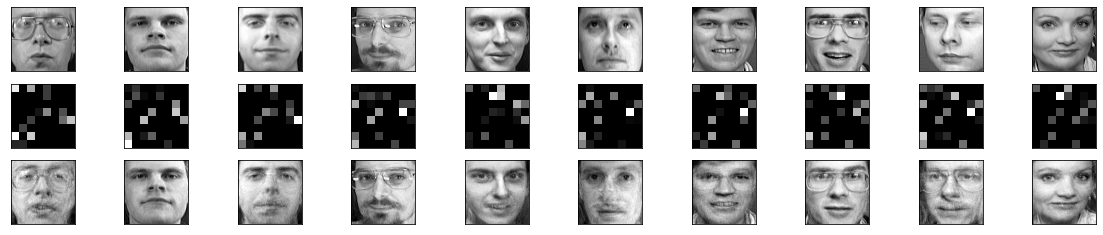

In [ ]:
#Tests of encoder
encoder = Model(inputs = autoencoder.input, outputs = autoencoder.layers[2].output)
encoded_imgs = encoder.predict(x_test)
print(encoded_imgs.shape)

#Retrieving last layer of autoencoder model
encoded_input = Input(shape=(64,))
decoder_layer = autoencoder.layers[3](encoded_input)
decoder_layer = autoencoder.layers[4](decoder_layer)
decoder_layer = autoencoder.layers[5](decoder_layer)

decoder = Model(inputs = encoded_input, outputs = decoder_layer)

decoded_imgs = decoder.predict(encoded_imgs)

print(encoded_imgs.shape)

predicted_imgs = autoencoder.predict(x_test, verbose=1)

n = 10  
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(3, n, i + 1)
    plt.imshow(x_test[i].reshape(64, 64))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display encoded images
    ax = plt.subplot(3, n, i + 1 + n)
    plt.imshow(encoded_imgs[i].reshape(8, 8))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(3, n, i + 1 + 2*n)
    plt.imshow(decoded_imgs[i].reshape(64, 64))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show(block=False)

In [ ]:
##Point from assignment:
#Unsupervised algorithm

#KMC classifier, kmeans is an unsupervised algorithm
kmeans = KMeans(n_clusters=40, max_iter=10000, algorithm='auto', random_state=7, verbose=1)

#Training the model
encoded_imgs = encoder.predict(x_train)
kmeans.fit(encoded_imgs)

#Predicting response
encoded_imgs = encoder.predict(x_test)
y_pred = kmeans.predict(encoded_imgs)
print(y_pred[0,])
print(y_test[0,])

#Printing accuracy
print("Accuracy:", accuracy_score(y_test, y_pred))

cmap = ListedColormap(['lightgrey', 'silver', 'ghostwhite', 'lavender', 'wheat'])
plt.rcParams["figure.figsize"] = (8, 8)

Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 24915.906
start iteration
done sorting
end inner loop
Iteration 1, inertia 23476.078
start iteration
done sorting
end inner loop
Iteration 2, inertia 22716.285
start iteration
done sorting
end inner loop
Iteration 3, inertia 22557.373
start iteration
done sorting
end inner loop
Iteration 4, inertia 22557.373
center shift 0.000000e+00 within tolerance 5.598162e-04
Initialization complete
start iteration
done sorting
end inner loop
Iteration 0, inertia 26021.484
start iteration
done sorting
end inner loop
Iteration 1, inertia 24605.963
start iteration
done sorting
end inner loop
Iteration 2, inertia 23941.906
start iteration
done sorting
end inner loop
Iteration 3, inertia 23881.578
start iteration
done sorting
end inner loop
Iteration 4, inertia 23821.885
start iteration
done sorting
end inner loop
Iteration 5, inertia 23821.885
center shift 0.000000e+00 within tolerance 5.598162e-04
Initialization 

In [ ]:
##Point from assignment:
#Supervised algorithm

print(y.shape)
print(y_train[0])
print(y_train.shape)

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

print(y_train_cat[0])

model = Sequential()
model.add(Dense(56, activation='relu', input_shape=(8*8,), name='hidden_layer'))
model.add(Dense(40, activation='softmax', name='output_layer'))
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()
plot_model(model, to_file='mnist_keras.png', show_shapes=True, show_layer_names=True)

enc_train = encoder.predict(x_train).reshape(320, 8*8)
enc_test = encoder.predict(x_test).reshape(80, 8*8)
print(enc_train.shape)
print(enc_test.shape)

history = model.fit(enc_train, y_train_cat, epochs=500, batch_size=32)
test_loss, test_accu = model.evaluate(enc_test, y_test_cat)

#print  aaccuracy
print(test_loss, test_accu)

(400,)
13
(320,)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden_layer (Dense)         (None, 56)                3640      
_________________________________________________________________
output_layer (Dense)         (None, 40)                2280      
Total params: 5,920
Trainable params: 5,920
Non-trainable params: 0
_________________________________________________________________
(320, 64)
(80, 64)
Epoch 1/500
10/10 [==============================] - 0s 2ms/step - loss: 5.6493 - accuracy: 0.0375
Epoch 2/500
10/10 [==============================] - 0s 1ms/step - loss: 4.3838 - accuracy: 0.0844
Epoch 3/500
10/10 [==============================] - 0s 1ms/step - loss: 3.7539 - accuracy: 0.1031
Epoch 4/500
10/10 [==============================] - 0s 1m

(320,)
(320,)


<Figure size 576x576 with 0 Axes>

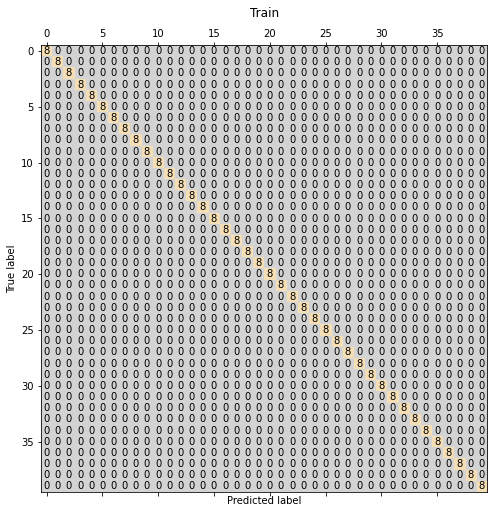

(80,)
(80,)
[ 1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39]
Precision score: 0.7183333333333334
Recall score   : 0.7
(79,)
(79,)


/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Figure size 576x576 with 0 Axes>

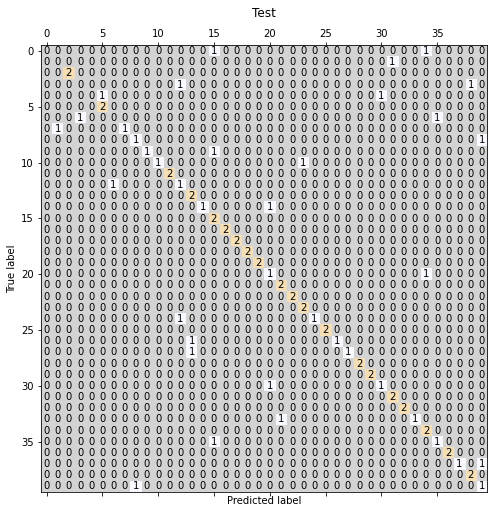

In [ ]:
#Confusion matrix
def cm_plot(ytest, ypred, title):
  print(ytest.shape)
  print(ypred.shape)

  cm = confusion_matrix(ytest, ypred)

  plt.figure()
  plt.matshow(cm, cmap=cmap)
  
  for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
      plt.text(x=j, y=i, s=cm[i,j], va='center', ha='center')
  
  plt.title(title)
  plt.xlabel('Predicted label')
  plt.ylabel('True label')
  plt.show()


y_pred_train = model.predict(enc_train)
y_pred_train = np.argmax(y_pred_train, axis=-1)
cm_plot(y_train, y_pred_train, title='Train')

y_pred_test = model.predict(enc_test)
y_pred_test = np.argmax(y_pred_test, axis=-1)
print(y_pred_test.shape)
print(y_test.shape)

print(np.unique(y_pred_test))
print(np.unique(y_test))

print('Precision score:', precision_score(y_test, y_pred_test, average='macro'))
print('Recall score   :', recall_score(y_test, y_pred_test, average='macro'))

cm_plot(y_test[1:], y_pred_test[1:], title='Test')

plt.show()